In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import os
import glob
from os import walk
from matplotlib.gridspec import GridSpec
from IPython.display import display, clear_output
from nano_lab import experiments
from mpl_toolkits.axes_grid1 import make_axes_locatable,ImageGrid
from matplotlib.gridspec import GridSpec
plt.style.use('../src/plotstyle.mplstyle')
exp= experiments('nano-lab','nsom','fg163r',True)
exp.dframe

In [117]:
sample='fg163r'
dsets = []
h5path= []
alldata=[]
ptable=[]
measures=[]
count=0
path='/media/labfiles/lab-exps/nano-lab/'
for (dirpath, dirnames, filenames) in walk(path):
    if sample in dirpath:
        datac=[]
        for name in sorted(glob.glob(dirpath+'/*.h5')):
            if 'nsom' in name:
                measures.append(name.split('/')[-1])
                h5path.append(name)
                opendat = h5.File(name,'r')
                for iset in opendat.keys():
                    print(iset)
                    dsets.append(iset)
                    for jset in opendat[iset].keys():
                        print(jset)
                        print(opendat[iset][jset].shape)
                        datac.append(np.array(opendat[iset][jset]))
        alldata.append(datac)
        ptable.append([count,measures[0]])
        count+=1              
                    
opendat = h5.File(h5path[0],'r')

Datos
datos_R
(17, 17, 3)
DatosEx
Amplitud
(17, 6535)
Fase
(17, 6535)


Run Frame No. : 10


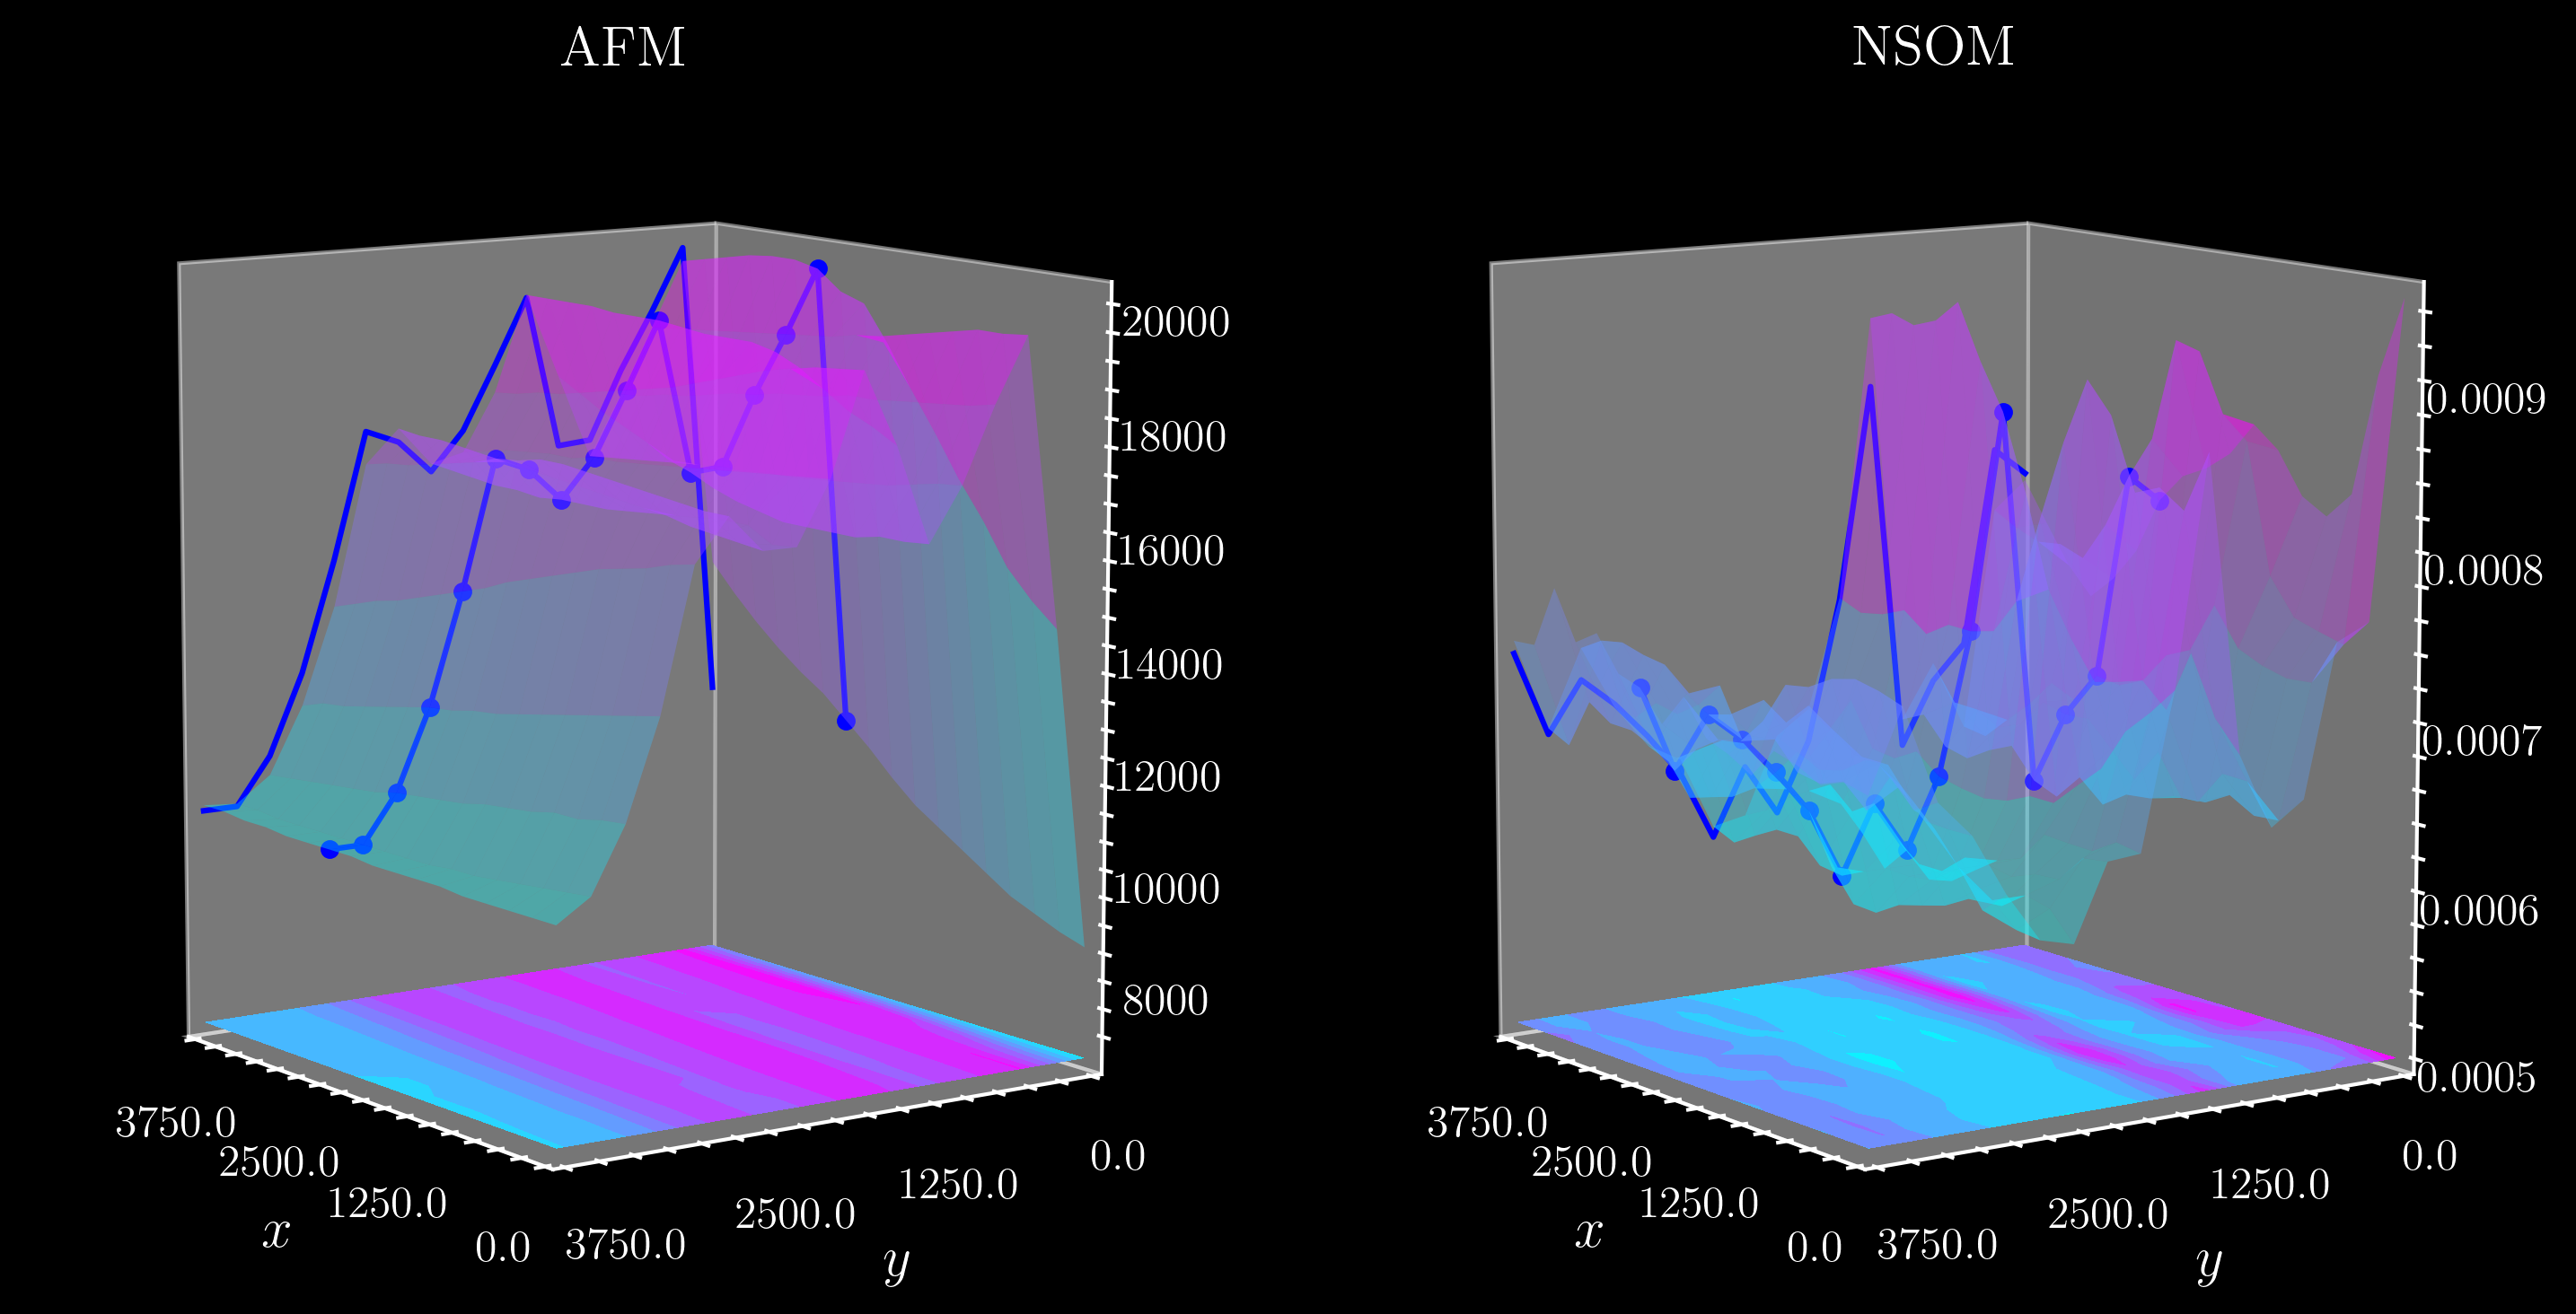

In [116]:
from locale import normalize
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import math

class exp_analysis:
    def __init__(self,alldata):
        self.exp1=alldata
        xi=0;xf=self.exp1.shape[1]
        yi=0;yf=self.exp1.shape[0]
        self.nx, self.ny = self.exp1.shape[1], self.exp1.shape[0]
        self.x, self.y = np.meshgrid(np.arange(0, self.nx, 1), np.arange(0, self.ny, 1))
        self.z   =  self.exp1[yi:yf,xi:xf]
    def mesh(self):
        return self.x,self.y

def new_axislabels(ax,step):
    newlabels=[labels*step for labels in ax.get_xticks().tolist()]
    return newlabels

def nsom_minoff(z,minoff):
    mo = math.floor(math.log(z.min(), 10))
    minz = float("%fe%d"%(z.min(),mo))
    mominz = float("1e%d"%(mo))
    return  (minoff*mominz)


afm = alldata[0][0][:,:,0]
nsom = alldata[0][0][:,:,1]


x,y = exp_analysis(afm).mesh()
z = exp_analysis(afm).z
z2 = exp_analysis(nsom).z


import warnings
warnings.filterwarnings("ignore")

plt.rcParams['xtick.labelsize']     = 12
plt.rcParams['ytick.labelsize']     = 12
plt.rcParams['text.usetex'] = True


fig = plt.figure(figsize=(12,7))
G = gridspec.GridSpec(1, 2,width_ratios=[1,1], wspace=0.1)# ax1 = fig.add_subplot(121, projection='3d')
# ax2 = fig.add_subplot(122)
ax1 = fig.add_subplot(G[0,0], projection='3d')
ax2 = fig.add_subplot(G[0,1], projection='3d')

def plotanalysis(ax1,ax2,line):
    ax1.clear()
    surf=ax1.plot_surface(x, y,z,cmap=cm.cool, linewidth=0,  antialiased=True, shade=False,alpha=0.35)
    ax1.contourf(x, y,z,zdir='z',cmap=cm.cool,offset=z.min()-2000,normalize="linear",origin="lower")
    ax1.plot(x[:,line],y[:,line],z[:,line],'-ob',lw=1.5,ms=4)
    ax1.plot(y[:,line], z[:,line], zs=x.max(), zdir='x', lw = 1.5, color = 'b')
    ax1.set_zlim([z.min()-2000,z.max()])
    ax1.set_title("AFM",fontsize=15)

    ax2.clear()

    z2min = nsom_minoff(z2,5)
    surf2=ax2.plot_surface(x, y,z2,cmap=cm.cool, linewidth=0,  antialiased=True, shade=False,alpha=0.35)
    ax2.contourf(x, y,z2,zdir='z',cmap=cm.cool,offset=z2min,normalize="linear",origin="lower")
    ax2.plot(x[:,line],y[:,line],z2[:,line],'-ob',lw=1.5,ms=4)
    ax2.plot(y[:,line], z2[:,line], zs=x.max(), zdir='x', lw = 1.5, color = 'b')
    ax2.set_zlim([z2min,z2.max()])
    ax2.set_title("NSOM",fontsize=15)

    for axs in fig.axes:
        axs.set_xlim(0.,16.)
        axs.set_ylim(0.,16.)
        axs.set_box_aspect((1.25, 1.25, 1.5))
        axs.grid(False)
        axs.set_xlabel(r'$x$',fontsize=15)
        axs.set_ylabel(r'$y$',fontsize=15)
        axs.locator_params(axis='x', nbins=5)
        axs.locator_params(axis='y', nbins=5)
        newlabels = new_axislabels(axs,250)
        axs.set_xticklabels(newlabels)
        axs.set_yticklabels(newlabels)
        axs.view_init(elev=10, azim=145)
    

def animate(frame):
    clear_output(wait=True)
    print("Run Frame No. :",frame)
    return plotanalysis(ax1,ax2,frame)


animation = animation.FuncAnimation(fig,animate,frames=np.arange(0,16)[::-1]);
animate(10)

In [ ]:
from IPython.display import HTML
HTML(animation.to_html5_video())


In [112]:

def nsom_minoff(z,minoff):
    mo = math.floor(math.log(z.min(), 10))
    minz = float("%fe%d"%(z.min(),mo))
    mominz = float("1e%d"%(mo))
    return  (minoff*mominz)
z2.min()-1E-3


-0.00041016666666666664

In [ ]:
%%time
animation.save('puppy0.mp4',  writer="ffmpeg",fps=3,dpi=300,progress_callback = lambda i, n: print(f'Saving frame {i} of {n}'))